Predição de Análise de Crédito - Desafio Kaggle
---

<br>

LinkedIn: [Willian Campos](https://www.linkedin.com/in/willian-campos-498550b2/)

# **Tópicos**
---

<ol type="1">
  <li>Análise do Negócio</li>
  <li>Entendimento dos Dados</li>
  <li>Análise das Variáveis Explicativas</li>  
  <li>Modelagem</li>
  <li>Conclusões</li>
</ol>







## 1\. Análise do Negócio

Esse projeto é um desafio proposto pela plataforma Kaggle, que é uma plataforma online 
de ciência de dados que oferece uma ampla variedade de recursos e competições relacionadas a dados. 
Nesse caso será feito uma análise dos dados para fazer uma projeção de se o cliente será 
inadimplente ou adimplente utilizando CRISP – DM (Cross-Industry Standard Process for Data Mining). 
[Desafio Kaggle](https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction)

Essa projeção envolvera o uso de Machine Learning, mais especificamente Árvores de Decisão, para avaliar se há um atraso maior ou igual a 90 dias em um horizonte de 12 meses, usando variáveis coletadas na data de avaliação de crédito. (tipicamente quando o cliente solicita o cartão).

Essas variáveis serão divididas entre variável resposta (target) e variáveis explicativas, a variável resposta diz se o cliente é adimplente ou inadimplente e as demais são dados dos clientes que vão ser analisadas e relacionadas para entender o resultado da variável resposta.

## 2\. Entendimento dos Dados

Nessa etapa será verificado os dados em geral para entender melhor o seu conteúdo e poder fazer correlações nos passos seguintes com a variável resposta, descrita como **mau** e as demais variáveis são as variáveis explicativas. Abaixo segue uma relação dos dados e o que eles representam:

| Variable Name            | Description                                         | Tipo  |
| ------------------------ |:---------------------------------------------------:| -----:|
| sexo| M = 'Masculino'; F = 'Feminino' |M/F|
| posse_de_veiculo| Y = 'possui'; N = 'não possui' |Y/N|
| posse_de_imovel| Y = 'possui'; N = 'não possui' |Y/N|
| qtd_filhos| Quantidade de filhos |inteiro|
| tipo_renda|Tipo de renda (ex: assaliariado, autônomo etc) | texto |
| educacao| Nível de educação (ex: secundário, superior etc) |texto|
| estado_civil | Estado civil (ex: solteiro, casado etc)| texto |
| tipo_residencia | tipo de residência (ex: casa/apartamento, com os pais etc) | texto |
| idade | idade em anos |inteiro|
| tempo de emprego | tempo de emprego em anos |inteiro|
| possui_celular | Indica se possui celular (1 = sim, 0 = não) |binária|
| possui_fone_comercial | Indica se possui telefone comercial (1 = sim, 0 = não) |binária|
| possui_fone | Indica se possui telefone (1 = sim, 0 = não) |binária|
| possui_email | Indica se possui e-mail (1 = sim, 0 = não) |binária|
| qt_pessoas_residencia | quantidade de pessoas na residência |inteiro|
| **mau** | indicadora de mau pagador (True = mau, False = bom) |binária|

Sendo assim, será utilizado um DataFrame onde cada linha representa um cliente com seu respectivo ID e as colunas são as variáveis que contem os dados desses clientes.

#### Carregando Pacotes
<br>
Esses são os pacotes que serão utilizados para fazer as analises e visualizações.

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import plot_tree

C:\Users\Bill_\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Bill_\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Bill_\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


#### Carregando Dados
<br>
Os dados utilizados vão ser armazenados na variável 'df', os dados foram carregados pela biblioteca pandas de um arquivo csv que é um arquivo no formato de linhas e colunas, perfeito para manipular dados, montar gráficos e poder fazer analises visuais e passados para o 'df' em um formato Data Frame do Pandas para que possa ser manipulado.

Dados relacionados a sexo foi removido devido a [Lei geral de Proteção de Dados](https://www.gov.br/cidadania/pt-br/acesso-a-informacao/lgpd#:~:text=A%20Lei%20Geral%20de%20Prote%C3%A7%C3%A3o,da%20personalidade%20de%20cada%20indiv%C3%ADduo.).

In [2]:
df = pd.read_csv('demo01.csv')
df = df.drop('sexo', axis = 1) # Removendo colunas de não interesse (devido a LGPD)
df_adimplente = df[df['mau']==False] # Criando variável para simplificar ao trabalhar com adimplentes
df_inadimplente = df[df['mau']==True] # Criando variável para simplificar ao trabalhar com inadimplentes

display(df.head())
print(f'Número de linhas(os clientes): {df.shape[0]}')
print(f'Número de colunas(as variáveis): {df.shape[1]}')

,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


Número de linhas(os clientes): 16650
Número de colunas(as variáveis): 15


### 2.1 Variáveis Categóricas e Numéricas

Existem técnicas estatísticas específicas projetadas para trabalhar com variáveis categóricas e numéricas. Ao separar os tipos de variáveis, pode-se escolher as abordagens apropriadas de análise estatística para cada conjunto de dados, então a análise inicial dos dados vão ser divididas em dados do tipo categórico e numérico.

Usando o comando dtypes podemos ver os tipos das variáveis, sendo o object as categóricas e as demais as numéricas, com exceção da variável mau que é do tipo booleana(verdadeiro ou falso), porém essa é a variável resposta que vai ser usada em conjunto com as demais.

Dessa maneira, podemos usar os dois comandos seguintes para mostrar as variáveis do tipo 'object' e do tipo 'number' e saber quais abordagens será tomada para cada caso.

In [3]:
df.dtypes


posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
dtype: object

In [4]:
# Comando para mostrar todas variáveis categóricas
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
posse_de_veiculo,16650,2,N,10178
posse_de_imovel,16650,2,Y,11176
tipo_renda,16650,5,Working,8565
educacao,16650,5,Secondary / secondary special,11245
estado_civil,16650,5,Married,11680
tipo_residencia,16650,6,House / apartment,14974


Aqui as variáveis de contatos, como celular, telefone comercial, telefone e email estão como numéricas, porém estão como dummies, 0 ou 1, o que as torna como booleanas na realidade.

In [5]:
# Comando para mostrar todas variáveis numéricas
df.select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
qtd_filhos,16650.0,0.433153,0.739395,0.000000,0.000000,0.000000,1.000000,14.000000
idade,16650.0,44.319513,11.228837,22.030137,34.873973,43.493151,53.410959,68.909589
tempo_emprego,16650.0,-161.416446,376.843912,-1000.665753,1.183562,4.691781,9.088356,42.906849
possui_celular,16650.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
possui_fone_comercial,16650.0,0.225225,0.417743,0.000000,0.000000,0.000000,0.000000,1.000000
possui_fone,16650.0,0.295676,0.456360,0.000000,0.000000,0.000000,1.000000,1.000000
possui_email,16650.0,0.088889,0.284592,0.000000,0.000000,0.000000,0.000000,1.000000
qt_pessoas_residencia,16650.0,2.211892,0.903755,1.000000,2.000000,2.000000,3.000000,15.000000


### 2.2 Dados Faltantes

Dados faltantes podem comprometer a qualidade dos dados e, consequentemente, a validade das análises realizadas. Se houver valores ausentes em variáveis relevantes, isso pode levar a conclusões incorretas ou enviesadas. 

Com o comando isna().any() aplicado ao DataFrame em análise é possível verificar se há algum dado faltante, retornando 'True' na coluna percorrida na verificação, como nesse caso todos voltaram como 'False', podemos concluir que não há dados faltantes.

In [6]:
df.isna().any()

posse_de_veiculo         False
posse_de_imovel          False
qtd_filhos               False
tipo_renda               False
educacao                 False
estado_civil             False
tipo_residencia          False
idade                    False
tempo_emprego            False
possui_celular           False
possui_fone_comercial    False
possui_fone              False
possui_email             False
qt_pessoas_residencia    False
mau                      False
dtype: bool

## 3\. Análise das Variáveis Explicativas

### 3.1 Variáveis Categóricas

#### Verificando Proporções

A análise de proporção permite comparar a distribuição de uma variável categórica entre diferentes grupos. Isso é especialmente útil quando se deseja investigar se há diferenças significativas nas proporções de uma determinada categoria entre os grupos.

####  Adimplentes e Inadimplentes

In [7]:
# Proporção de Adimplentes e Inadimplentes

q_total, _ = df.shape
q_adimplente, _ = df[df['mau']==False].shape
q_inadimplente, _ = df[df['mau']==True].shape

print(f'Total Adimplente: {q_adimplente}')
print(f'Total Inadimplente: {q_inadimplente}')
print(f'Proporção é de: {round((q_adimplente/q_total)*100, 2)}%  de adimplentes e {round((q_inadimplente/q_total)*100, 2)}% de inadimplentes')

Total Adimplente: 16260
Total Inadimplente: 390
Proporção é de: 97.66%  de adimplentes e 2.34% de inadimplentes


#### Posse de Veículo

Text(0.5, 1.0, 'Inadimplentes')

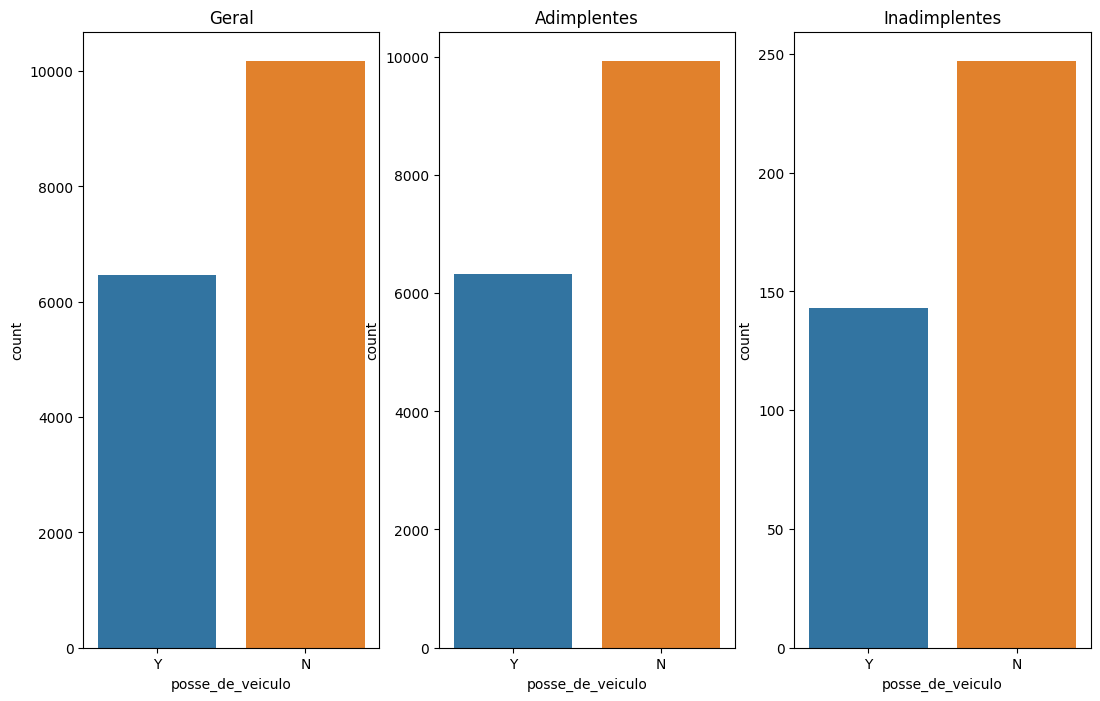

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(13, 8))

ordem = ['Y', 'N']

sns.countplot(data=df, x='posse_de_veiculo', ax=axes[0], order=ordem)
axes[0].set_title('Geral')

sns.countplot(data=df_adimplente, x='posse_de_veiculo', ax=axes[1], order=ordem)
axes[1].set_title('Adimplentes')

sns.countplot(data=df_inadimplente, x='posse_de_veiculo', ax=axes[2], order=ordem)
axes[2].set_title('Inadimplentes')


In [9]:
print(f"Valores possíveis em posse_de_veiculo: {df['posse_de_veiculo'].unique()}")

q_posse_de_veiculo_Y, _ = df[df['posse_de_veiculo']=='Y'].shape
q_posse_de_veiculo_N, _ = df[df['posse_de_veiculo']=='N'].shape

print(f'\nTotal que tem veiculo: {q_posse_de_veiculo_Y}')
print(f'Total sem veiculo: {q_posse_de_veiculo_N}')

print(f'Proporção que tem veiculo é de {round((q_posse_de_veiculo_Y / q_total) * 100, 2)}%')
print(f'Proporção sem veiculo é de {round((q_posse_de_veiculo_N / q_total) * 100, 2)}%')

veiculo_Y_inadimplente = df_inadimplente[df_inadimplente['posse_de_veiculo']=='Y'].shape[0]
veiculo_N_inadimplente = df_inadimplente[df_inadimplente['posse_de_veiculo']=='N'].shape[0]

print('\nProporção de Clientes Inadimplentes com veiculo(Y) e sem veiculo(N):')
print(f'Y:{round((veiculo_Y_inadimplente/q_posse_de_veiculo_Y)*100, 2)}%')
print(f'N:{round((veiculo_N_inadimplente/q_posse_de_veiculo_N)*100, 2)}%')


Valores possíveis em posse_de_veiculo: ['Y' 'N']

Total que tem veiculo: 6472
Total sem veiculo: 10178
Proporção que tem veiculo é de 38.87%
Proporção sem veiculo é de 61.13%

Proporção de Clientes Inadimplentes com veiculo(Y) e sem veiculo(N):
Y:2.21%
N:2.43%


#### Posse de Imóvel

Text(0.5, 1.0, 'Inadimplentes')

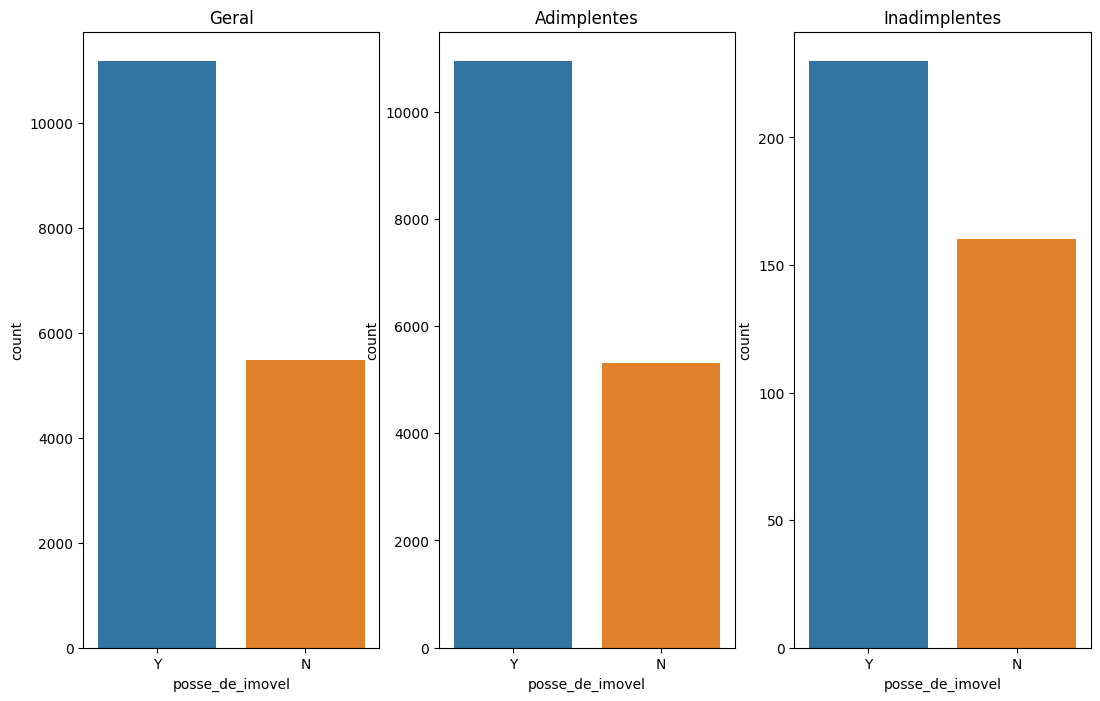

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(13, 8))

ordem = ['Y', 'N']

sns.countplot(data=df, x='posse_de_imovel', ax=axes[0], order=ordem)
axes[0].set_title('Geral')

sns.countplot(data=df_adimplente, x='posse_de_imovel', ax=axes[1], order=ordem)
axes[1].set_title('Adimplentes')

sns.countplot(data=df_inadimplente, x='posse_de_imovel', ax=axes[2], order=ordem)
axes[2].set_title('Inadimplentes')


In [11]:
print(f"Valores possíveis em posse_de_imovel: {df['posse_de_imovel'].unique()}")

q_posse_de_imovel_Y, _ = df[df['posse_de_imovel']=='Y'].shape
q_posse_de_imovel_N, _ = df[df['posse_de_imovel']=='N'].shape

print(f'\nTotal que tem imovel: {q_posse_de_imovel_Y}')
print(f'Total sem imovel: {q_posse_de_imovel_N}')

print(f'Proporção que tem imovel é de {round((q_posse_de_imovel_Y / q_total) * 100, 2)}%')
print(f'Proporção sem imovel é de {round((q_posse_de_imovel_N / q_total) * 100, 2)}%')

imovel_Y_inadimplente = df_inadimplente[df_inadimplente['posse_de_imovel']=='Y'].shape[0]
imovel_N_inadimplente = df_inadimplente[df_inadimplente['posse_de_imovel']=='N'].shape[0]

print('\nProporção de Clientes Inadimplentes com imovel(Y) e sem imovel(N):')
print(f'Y:{round((imovel_Y_inadimplente/q_posse_de_imovel_Y)*100, 2)}%')
print(f'N:{round((imovel_N_inadimplente/q_posse_de_imovel_N)*100, 2)}%')

Valores possíveis em posse_de_imovel: ['Y' 'N']

Total que tem imovel: 11176
Total sem imovel: 5474
Proporção que tem imovel é de 67.12%
Proporção sem imovel é de 32.88%

Proporção de Clientes Inadimplentes com imovel(Y) e sem imovel(N):
Y:2.06%
N:2.92%


#### Tipo de Renda

[Text(0, 0, 'Working'),
 Text(1, 0, 'Commercial associate'),
 Text(2, 0, 'State servant'),
 Text(3, 0, 'Pensioner'),
 Text(4, 0, 'Student')]

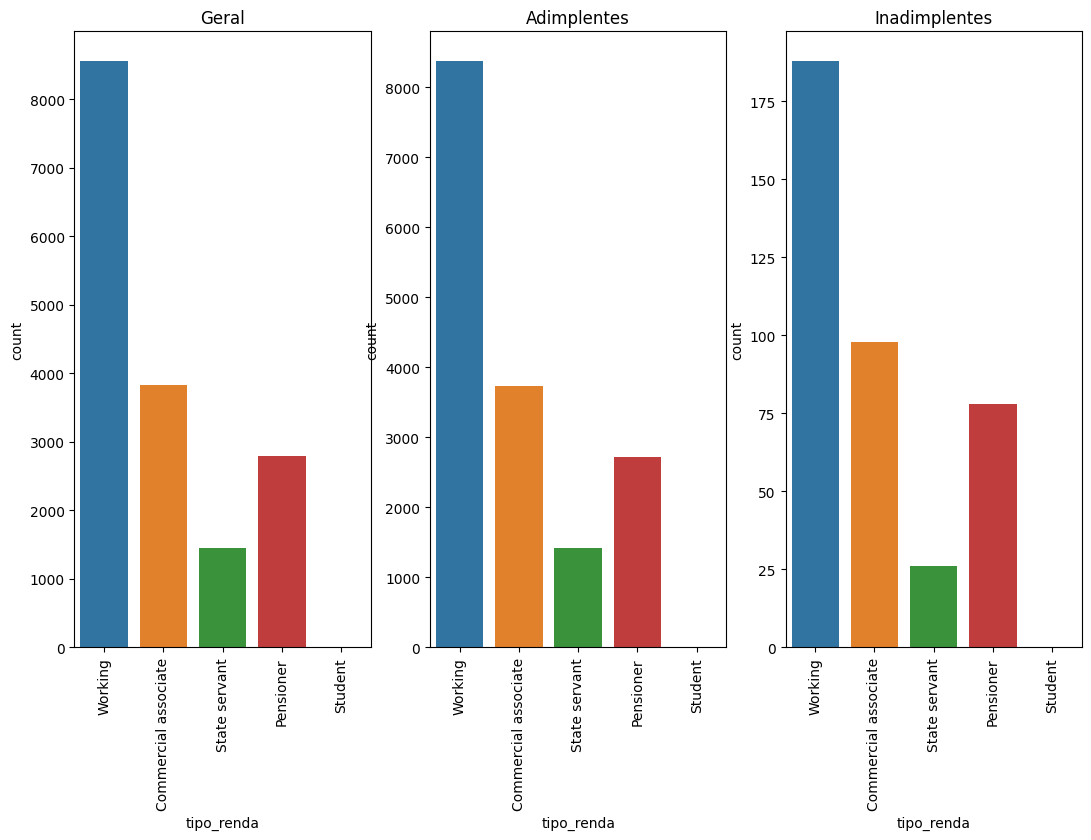

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(13, 8))

ordem = ['Working', 'Commercial associate', 'State servant', 'Pensioner', 'Student']

sns.countplot(data=df, x='tipo_renda', ax=axes[0], order=ordem)
axes[0].set_title('Geral')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

sns.countplot(data=df_adimplente, x='tipo_renda', ax=axes[1], order=ordem)
axes[1].set_title('Adimplentes')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

sns.countplot(data=df_inadimplente, x='tipo_renda', ax=axes[2], order=ordem)
axes[2].set_title('Inadimplentes')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)

In [13]:
print(f"Valores possíveis em tipo_renda: {df['tipo_renda'].unique()}")

q_tipo_renda_Working, _ = df[df['tipo_renda']=='Working'].shape
q_tipo_renda_Commercial_associate, _ = df[df['tipo_renda']=='Commercial associate'].shape
q_tipo_State_servant, _ = df[df['tipo_renda']=='State servant'].shape
q_tipo_renda_Pensioner, _ = df[df['tipo_renda']=='Pensioner'].shape
q_tipo_renda_Student, _ = df[df['tipo_renda']=='Student'].shape

print(f'\nWorking: {q_tipo_renda_Working}')
print(f'Commercial associate: {q_tipo_renda_Commercial_associate}')
print(f'State servant: {q_tipo_State_servant}')
print(f'Pensioner: {q_tipo_renda_Pensioner}')
print(f'Student: {q_tipo_renda_Student}')

tabela_proporção_tipo_renda = pd.crosstab(df['tipo_renda'], df['mau'], normalize='index')
tabela_proporção_tipo_renda = tabela_proporção_tipo_renda.sort_values(by= True, ascending=False)
tabela_proporção_tipo_renda = tabela_proporção_tipo_renda.applymap(lambda x: f'{x*100:.2f}%')
tabela_proporção_tipo_renda = tabela_proporção_tipo_renda.rename(columns={False:'Adimplente', True:'Inadimplente'})
tabela_proporção_tipo_renda


Valores possíveis em tipo_renda: ['Working' 'Commercial associate' 'State servant' 'Pensioner' 'Student']

Working: 8565
Commercial associate: 3826
State servant: 1451
Pensioner: 2800
Student: 8


mau,Adimplente,Inadimplente
tipo_renda,,
Pensioner,97.21%,2.79%
Commercial associate,97.44%,2.56%
Working,97.81%,2.19%
State servant,98.21%,1.79%
Student,100.00%,0.00%


#### Educação

[Text(0, 0, 'Secondary / secondary special'),
 Text(1, 0, 'Higher education'),
 Text(2, 0, 'Incomplete higher'),
 Text(3, 0, 'Lower secondary'),
 Text(4, 0, 'Academic degree')]

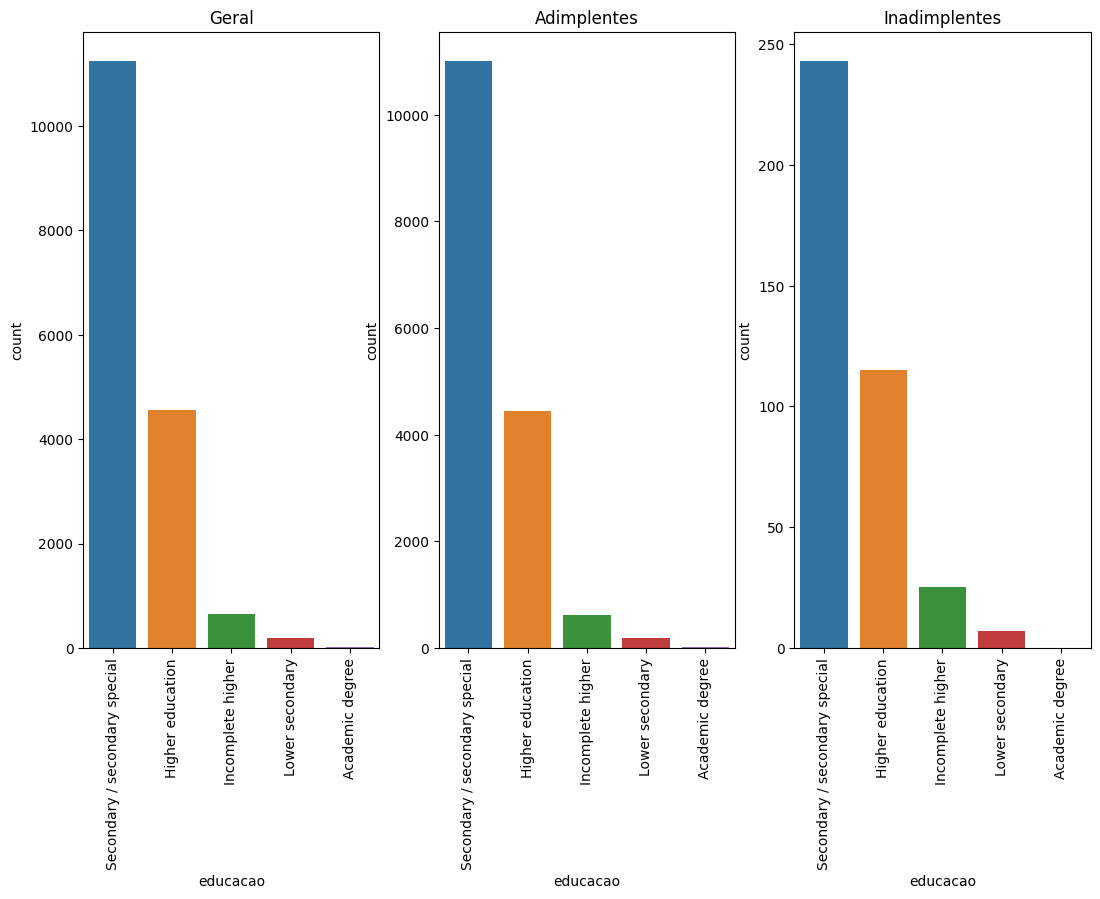

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(13, 8))

ordem = ['Secondary / secondary special', 'Higher education', 
               'Incomplete higher', 'Lower secondary', 'Academic degree']

sns.countplot(data=df, x='educacao', ax=axes[0], order=ordem)
axes[0].set_title('Geral')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

sns.countplot(data=df_adimplente, x='educacao', ax=axes[1], order=ordem)
axes[1].set_title('Adimplentes')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

sns.countplot(data=df_inadimplente, x='educacao', ax=axes[2], order=ordem)
axes[2].set_title('Inadimplentes')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)

In [15]:
print(f"Valores possíveis em educacao: {df['educacao'].unique()}")

q_educacao_Secondary, _ = df[df['educacao']=='Secondary / secondary special'].shape
q_educacao_Higher_education, _ = df[df['educacao']=='Higher education'].shape
q_educacao_Incomplete_higher, _ = df[df['educacao']=='Incomplete higher'].shape
q_educacao_Lower_secondary, _ = df[df['educacao']=='Lower secondary'].shape
q_educacao_Academic_degree, _ = df[df['educacao']=='Academic degree'].shape

print(f'\nSecondary: {q_educacao_Secondary}')
print(f'Higher education: {q_educacao_Higher_education}')
print(f'Incomplete higher: {q_educacao_Incomplete_higher}')
print(f'Lower secondary: {q_educacao_Lower_secondary}')
print(f'Academic degree: {q_educacao_Academic_degree}')

tabela_proporção_educacao = pd.crosstab(df['educacao'], df['mau'], normalize='index')
tabela_proporção_educacao = tabela_proporção_educacao.sort_values(by= True, ascending=False)
tabela_proporção_educacao = tabela_proporção_educacao.applymap(lambda x: f'{x*100:.2f}%')
tabela_proporção_educacao = tabela_proporção_educacao.rename(columns={False:'Adimplente', True:'Inadimplente'})
tabela_proporção_educacao

Valores possíveis em educacao: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

Secondary: 11245
Higher education: 4551
Incomplete higher: 649
Lower secondary: 188
Academic degree: 17


mau,Adimplente,Inadimplente
educacao,,
Incomplete higher,96.15%,3.85%
Lower secondary,96.28%,3.72%
Higher education,97.47%,2.53%
Secondary / secondary special,97.84%,2.16%
Academic degree,100.00%,0.00%


#### Estado Civil

[Text(0, 0, 'Married'),
 Text(1, 0, 'Single / not married'),
 Text(2, 0, 'Civil marriage'),
 Text(3, 0, 'Widow'),
 Text(4, 0, 'Separated')]

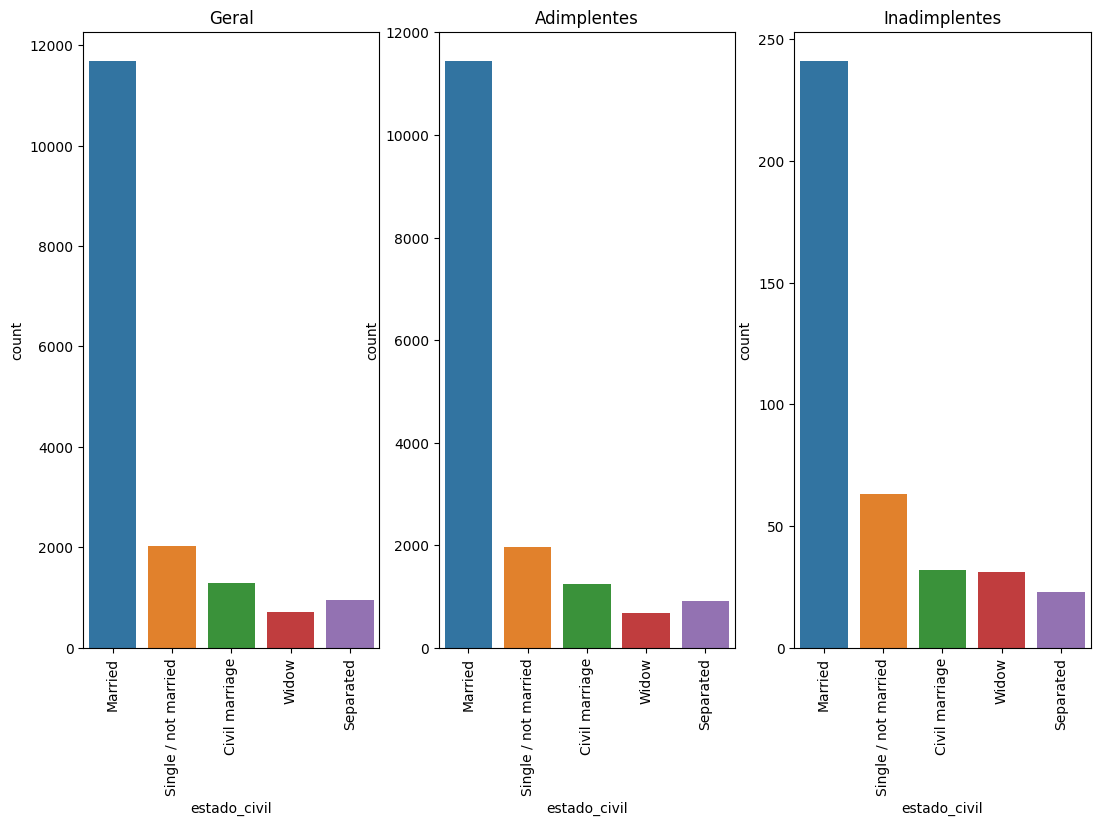

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(13, 8))

ordem = ['Married', 'Single / not married', 
               'Civil marriage', 'Widow', 'Separated']

sns.countplot(data=df, x='estado_civil', ax=axes[0], order=ordem)
axes[0].set_title('Geral')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

sns.countplot(data=df_adimplente, x='estado_civil', ax=axes[1], order=ordem)
axes[1].set_title('Adimplentes')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

sns.countplot(data=df_inadimplente, x='estado_civil', ax=axes[2], order=ordem)
axes[2].set_title('Inadimplentes')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)

In [17]:
print(f"Valores possíveis em estado_civil: {df['estado_civil'].unique()}")

q_estado_civil_Married, _ = df[df['estado_civil']=='Married'].shape
q_estado_civil_Single, _ = df[df['estado_civil']=='Single / not married'].shape
q_estado_civil_Civil_marriage, _ = df[df['estado_civil']=='Civil marriage'].shape
q_estado_civil_Widow, _ = df[df['estado_civil']=='Widow'].shape
q_estado_civil_Separated, _ = df[df['estado_civil']=='Separated'].shape

print(f'\nMarried: {q_estado_civil_Married}')
print(f'Single: {q_estado_civil_Single}')
print(f'Civil marriage: {q_estado_civil_Civil_marriage}')
print(f'Widow: {q_estado_civil_Widow}')
print(f'Separated: {q_estado_civil_Separated}')

tabela_proporção_estado_civil = pd.crosstab(df['estado_civil'], df['mau'], normalize='index')
tabela_proporção_estado_civil = tabela_proporção_estado_civil.sort_values(by= True, ascending=False)
tabela_proporção_estado_civil = tabela_proporção_estado_civil.applymap(lambda x: f'{x*100:.2f}%')
tabela_proporção_estado_civil = tabela_proporção_estado_civil.rename(columns={False:'Adimplente', True:'Inadimplente'})
tabela_proporção_estado_civil

Valores possíveis em estado_civil: ['Married' 'Single / not married' 'Civil marriage' 'Widow' 'Separated']

Married: 11680
Single: 2035
Civil marriage: 1283
Widow: 707
Separated: 945


mau,Adimplente,Inadimplente
estado_civil,,
Widow,95.62%,4.38%
Single / not married,96.90%,3.10%
Civil marriage,97.51%,2.49%
Separated,97.57%,2.43%
Married,97.94%,2.06%


#### Tipo de Residência

[Text(0, 0, 'House / apartment'),
 Text(1, 0, 'Rented apartment'),
 Text(2, 0, 'Municipal apartment'),
 Text(3, 0, 'With parents'),
 Text(4, 0, 'Co-op apartment'),
 Text(5, 0, 'Office apartment')]

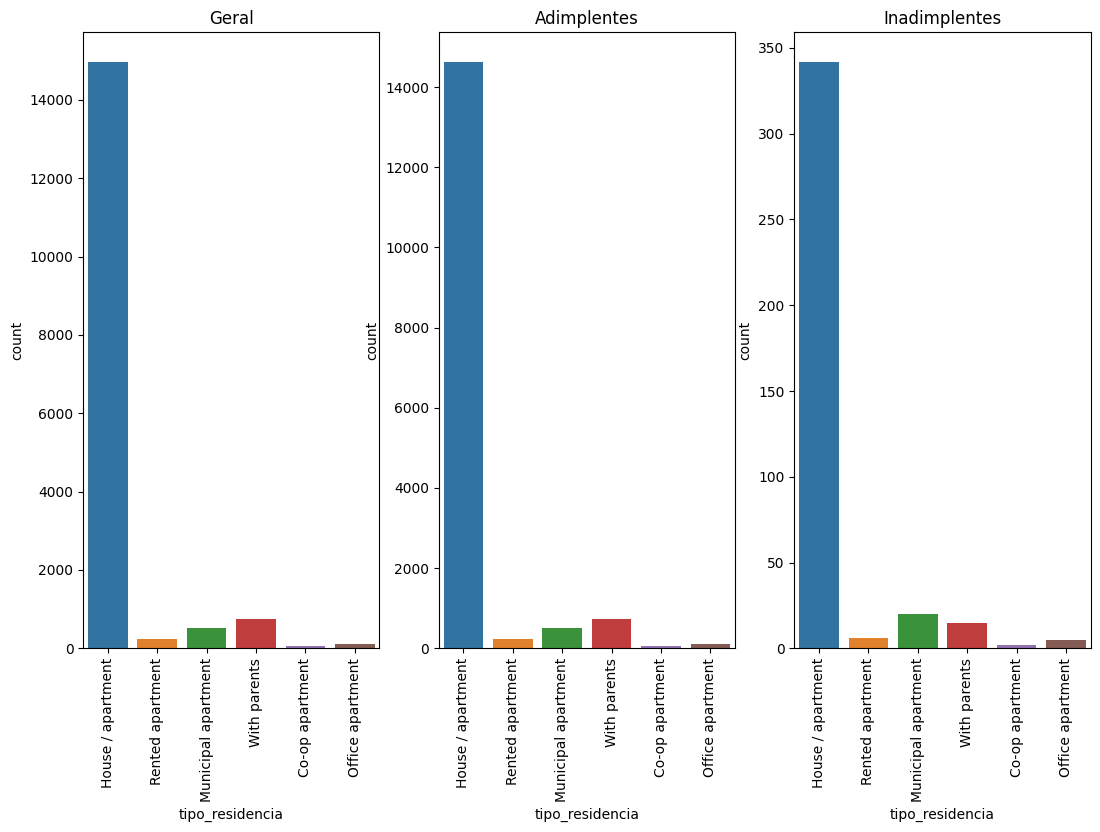

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(13, 8))

ordem = ['House / apartment', 'Rented apartment', 'Municipal apartment', 
               'With parents', 'Co-op apartment', 'Office apartment']

sns.countplot(data=df, x='tipo_residencia', ax=axes[0], order=ordem)
axes[0].set_title('Geral')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

sns.countplot(data=df_adimplente, x='tipo_residencia', ax=axes[1], order=ordem)
axes[1].set_title('Adimplentes')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

sns.countplot(data=df_inadimplente, x='tipo_residencia', ax=axes[2], order=ordem)
axes[2].set_title('Inadimplentes')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)

In [19]:
print(f"Valores possíveis em tipo_residencia: {df['tipo_residencia'].unique()}")

q_tipo_residencia_House_apartment, _ = df[df['tipo_residencia']=='House / apartment'].shape
q_tipo_residencia_Rented_apartment, _ = df[df['tipo_residencia']=='Rented apartment'].shape
q_tipo_residencia_Municipal_apartment, _ = df[df['tipo_residencia']=='Municipal apartment'].shape
q_tipo_residencia_With_parents, _ = df[df['tipo_residencia']=='With parents'].shape
q_tipo_residencia_Coop_apartment, _ = df[df['tipo_residencia']=='Co-op apartment'].shape
q_tipo_residencia_Office_apartment, _ = df[df['tipo_residencia']=='Office apartment'].shape

print(f'\House / apartment: {q_tipo_residencia_House_apartment}')
print(f'Rented apartment: {q_tipo_residencia_Rented_apartment}')
print(f'Municipal apartment: {q_tipo_residencia_Municipal_apartment}')
print(f'With parents: {q_tipo_residencia_With_parents}')
print(f'Co-op apartment: {q_tipo_residencia_Coop_apartment}')
print(f'Office apartment: {q_tipo_residencia_Office_apartment}')


tabela_proporção_tipo_residencia = pd.crosstab(df['tipo_residencia'], df['mau'], normalize='index')
tabela_proporção_tipo_residencia = tabela_proporção_tipo_residencia.sort_values(by= True, ascending=False)
tabela_proporção_tipo_residencia = tabela_proporção_tipo_residencia.applymap(lambda x: f'{x*100:.2f}%')
tabela_proporção_tipo_residencia = tabela_proporção_tipo_residencia.rename(columns={False:'Adimplente', True:'Inadimplente'})
tabela_proporção_tipo_residencia


Valores possíveis em tipo_residencia: ['House / apartment' 'Rented apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']
\House / apartment: 14974
Rented apartment: 227
Municipal apartment: 520
With parents: 738
Co-op apartment: 71
Office apartment: 120


mau,Adimplente,Inadimplente
tipo_residencia,,
Office apartment,95.83%,4.17%
Municipal apartment,96.15%,3.85%
Co-op apartment,97.18%,2.82%
Rented apartment,97.36%,2.64%
House / apartment,97.72%,2.28%
With parents,97.97%,2.03%


#### Possui: Celular? Telefone Fixo? Telefone Comercial? Email?

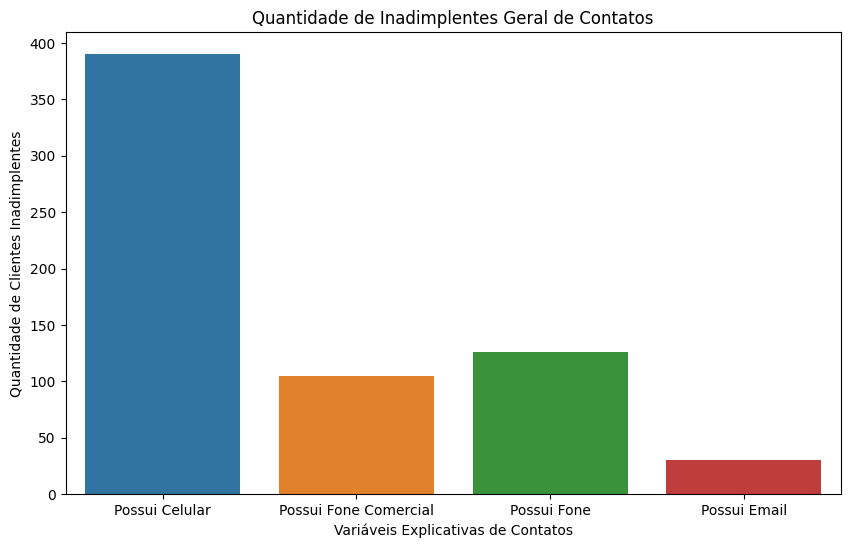

In [20]:
# Criar um DataFrame temporário para o gráfico, onde verifica se ambos os valores serem verdadeiros, se sim
# Então faz a somatória de inadimplentes pela variável 'mau'
df_contatos = pd.DataFrame({
    'Variável Explicativa': ['Possui Celular', 'Possui Fone Comercial', 'Possui Fone', 'Possui Email'],
    'Quantidade de Clientes Inadimplentes': [
        df.loc[df['possui_celular'] & df['mau'], 'mau'].sum(),
        df.loc[df['possui_fone_comercial'] & df['mau'], 'mau'].sum(),
        df.loc[df['possui_fone'] & df['mau'], 'mau'].sum(),
        df.loc[df['possui_email'] & df['mau'], 'mau'].sum()
    ]
})

# Criando o gráfico de barras usando o DF criado acima
plt.figure(figsize=(10, 6))
sns.barplot(data=df_contatos, x='Variável Explicativa', y='Quantidade de Clientes Inadimplentes')
plt.xlabel('Variáveis Explicativas de Contatos')
plt.ylabel('Quantidade de Clientes Inadimplentes')
plt.title('Quantidade de Inadimplentes Geral de Contatos')
plt.show()

Text(0.5, 1.0, 'Quantidade de Inadimplentes Proporcional de Contatos')

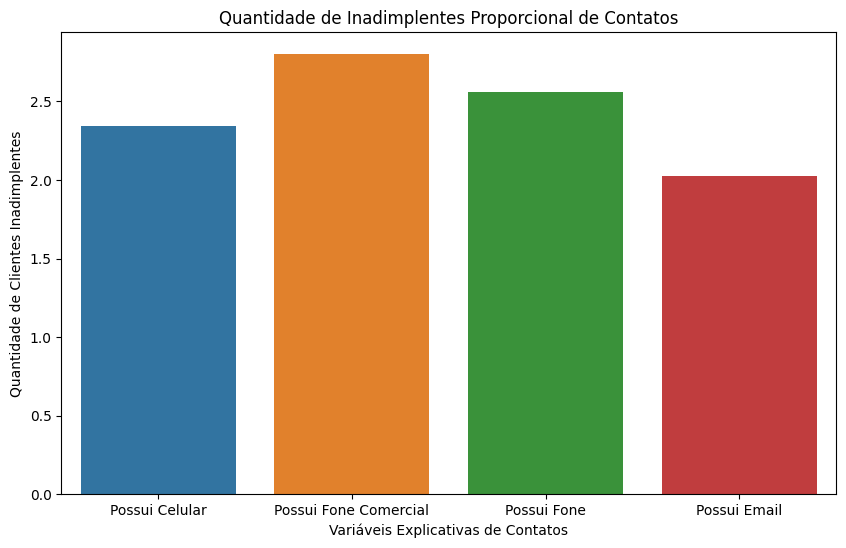

In [21]:
# Atribuindo o total de cada coluna a uma variável, onde o valor é 1, tem o contato.
total_email = (df['possui_email']==1).sum()
total_fone = (df['possui_fone']==1).sum()
total_fone_comercial = (df['possui_fone_comercial']==1).sum()
total_celular = (df['possui_celular']==1).sum()

# Atribuindo o total de inadimplentes de cada tipo de contato.
inadimplente_email = (df_inadimplente['possui_email']==1).sum()
inadimplente_fone = (df_inadimplente['possui_fone']==1).sum()
inadimplente_fone_comercial = (df_inadimplente['possui_fone_comercial']==1).sum()
inadimplente_celular = (df_inadimplente['possui_celular']==1).sum()

# Criando um DataFrame com duas colunas, Contato, onde cada linha é um contato e 
# Proporção de Inadimplentes, onde cada linha é a proporção do respectivo contato.
df_contatos_proporcional = pd.DataFrame({
    'Contatos': ['Possui Celular', 'Possui Fone Comercial', 'Possui Fone', 'Possui Email'],
    'Proporção de Inadimplentes': [(inadimplente_celular/total_celular)*100, 
                                   (inadimplente_fone_comercial/total_fone_comercial)*100,
                                   (inadimplente_fone/total_fone)*100,
                                   (inadimplente_email/total_email)*100,
                                  ]
})


# Plot do gráfico em barras usando o DataFrame criado
plt.figure(figsize=(10, 6))
sns.barplot(data=df_contatos_proporcional, x='Contatos', y='Proporção de Inadimplentes')
plt.xlabel('Variáveis Explicativas de Contatos')
plt.ylabel('Quantidade de Clientes Inadimplentes')
plt.title('Quantidade de Inadimplentes Proporcional de Contatos')




In [22]:
tabela_proporção_email = pd.crosstab(df['possui_email'], df['mau'], normalize='index')
tabela_proporção_email = tabela_proporção_email.sort_values(by= True, ascending=False)
tabela_proporção_email = tabela_proporção_email.applymap(lambda x: f'{x*100:.2f}%')
tabela_proporção_email = tabela_proporção_email.rename(columns={False:'Adimplente', True:'Inadimplente'})
print(tabela_proporção_email)

tabela_proporção_fone = pd.crosstab(df['possui_fone'], df['mau'], normalize='index')
tabela_proporção_fone = tabela_proporção_fone.sort_values(by= True, ascending=False)
tabela_proporção_fone = tabela_proporção_fone.applymap(lambda x: f'{x*100:.2f}%')
tabela_proporção_fone = tabela_proporção_fone.rename(columns={False:'Adimplente', True:'Inadimplente'})
print(f'\n\n{tabela_proporção_fone}')

tabela_proporção_fone_comercial = pd.crosstab(df['possui_fone_comercial'], df['mau'], normalize='index')
tabela_proporção_fone_comercial = tabela_proporção_fone_comercial.sort_values(by= True, ascending=False)
tabela_proporção_fone_comercial = tabela_proporção_fone_comercial.applymap(lambda x: f'{x*100:.2f}%')
tabela_proporção_fone_comercial = tabela_proporção_fone_comercial.rename(columns={False:'Adimplente', True:'Inadimplente'})
print(f'\n\n{tabela_proporção_fone_comercial}')

tabela_proporção_celular = pd.crosstab(df['possui_celular'], df['mau'], normalize='index')
tabela_proporção_celular = tabela_proporção_celular.sort_values(by= True, ascending=False)
tabela_proporção_celular = tabela_proporção_celular.applymap(lambda x: f'{x*100:.2f}%')
tabela_proporção_celular = tabela_proporção_celular.rename(columns={False:'Adimplente', True:'Inadimplente'})
print(f'\n\n{tabela_proporção_celular}')

mau          Adimplente Inadimplente
possui_email                        
0                97.63%        2.37%
1                97.97%        2.03%


mau         Adimplente Inadimplente
possui_fone                        
1               97.44%        2.56%
0               97.75%        2.25%


mau                   Adimplente Inadimplente
possui_fone_comercial                        
1                         97.20%        2.80%
0                         97.79%        2.21%


mau            Adimplente Inadimplente
possui_celular                        
1                  97.66%        2.34%


Em alguns casos ficam visiveis a diferença das colunas no gráfico geral/adimplentes para os inadimplentes, como por exemplo o caso dos viúvos(as) que ultrapassam as pessoas separadas ou com casamento civil no gráfico de inadimplentes.

Em outros casos, fica mais difícil de entender o peso de cada variável apenas olhando para o gráfico, porém, sabendo que a proporção geral de inadimplentes é de 2.34%, podemos ver a comparação desse valor caso a caso com todas as variáveis e todos seus valores possiveis que variam com valores maiores e menores que a proporção geral, sendo que valores maiores indicam clientes que contribuem para esse aumento e menores clientes que contribuem para a diminuição da proporção geral de inadimplência.

### 3.2 Variáveis Numéricas

#### Quantidade de Filhos

Text(0, 0.5, 'Quantidade Inadimplente')

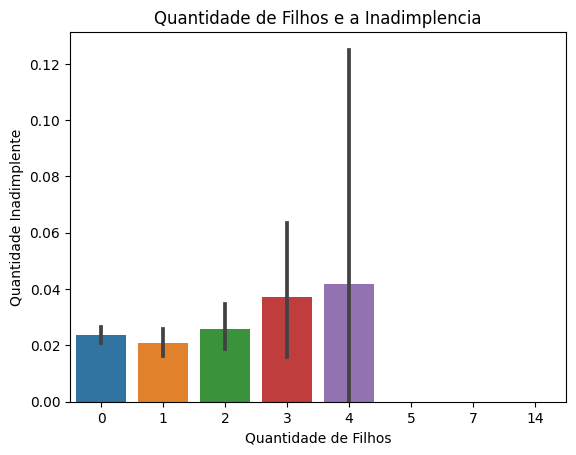

In [23]:
sns.barplot(x='qtd_filhos', y='mau', data=df)
plt.title('Quantidade de Filhos e a Inadimplencia')
plt.xlabel('Quantidade de Filhos')
plt.ylabel('Quantidade Inadimplente')

In [24]:
tabela_proporção_qtd_filhos = pd.crosstab(df['qtd_filhos'], df['mau'], normalize='index')
tabela_proporção_qtd_filhos = tabela_proporção_qtd_filhos.sort_values(by= True, ascending=False)
tabela_proporção_qtd_filhos = tabela_proporção_qtd_filhos.applymap(lambda x: f'{x*100:.2f}%')
tabela_proporção_qtd_filhos = tabela_proporção_qtd_filhos.rename(columns={False:'Adimplente', True:'Inadimplente'})
tabela_proporção_qtd_filhos

mau,Adimplente,Inadimplente
qtd_filhos,,
4,95.83%,4.17%
3,96.30%,3.70%
2,97.42%,2.58%
0,97.64%,2.36%
1,97.91%,2.09%
5,100.00%,0.00%
7,100.00%,0.00%
14,100.00%,0.00%


#### Idade

Text(0, 0.5, 'Quantidade Inadimplente')

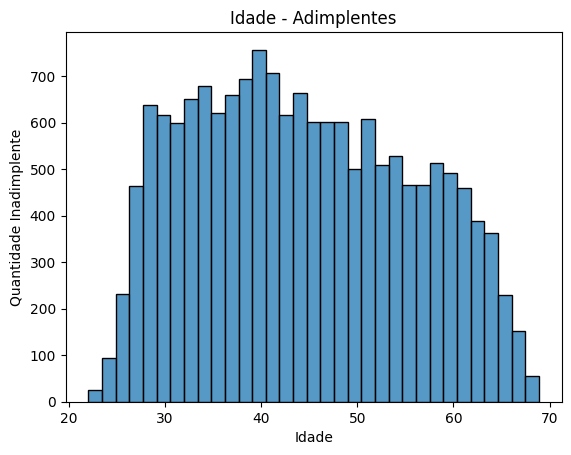

In [25]:
sns.histplot(x='idade', data=df_adimplente)
plt.title('Idade - Adimplentes')
plt.xlabel('Idade')
plt.ylabel('Quantidade Inadimplente')

Text(0, 0.5, 'Quantidade Inadimplente')

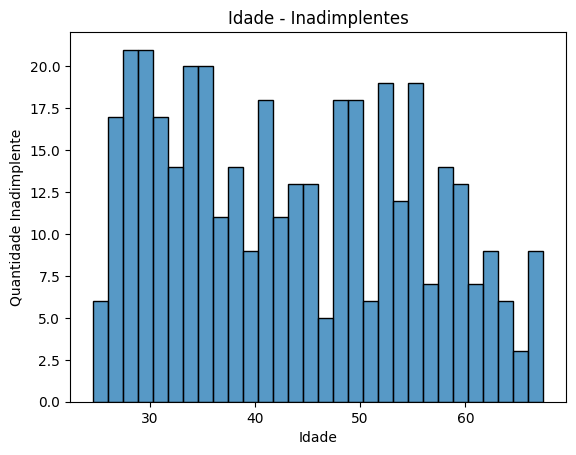

In [26]:
sns.histplot(x='idade', data=df_inadimplente, bins=30)
plt.title('Idade - Inadimplentes')
plt.xlabel('Idade')
plt.ylabel('Quantidade Inadimplente')

In [27]:
# Criando uma faixa de idade para poder fazer um crosstab
df['faixa_idade'] = pd.cut(df['idade'], bins=[10, 20, 30, 40, 50, 60, 70], 
                           labels=['10-20', '21-30', '31-40', '41-50', '51-60', '61-70'])

tabela_proporção_idade = pd.crosstab(df['faixa_idade'], df['mau'], normalize='index')
tabela_proporção_idade = tabela_proporção_idade.sort_values(by= True, ascending=False)
tabela_proporção_idade = tabela_proporção_idade.applymap(lambda x: f'{x*100:.2f}%')
tabela_proporção_idade = tabela_proporção_idade.rename(columns={False:'Adimplente', True:'Inadimplente'})
tabela_proporção_idade

mau,Adimplente,Inadimplente
faixa_idade,,
21-30,96.89%,3.11%
51-60,97.53%,2.47%
31-40,97.67%,2.33%
61-70,97.84%,2.16%
41-50,97.99%,2.01%


##### Tempo de Emprego

Text(0, 0.5, 'Quantidade de Inadimplentes')

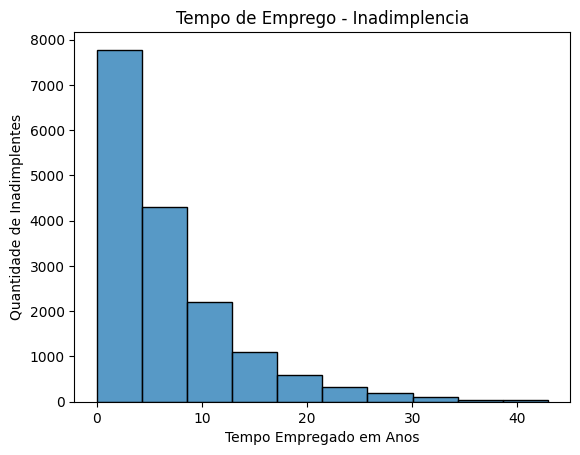

In [28]:
df_empregados = df[['tempo_emprego', 'mau']].copy()
df_empregados.loc[df_empregados['tempo_emprego'] < 0, 'tempo_emprego'] = 0
sns.histplot(x='tempo_emprego', data=df_empregados, bins=10)
plt.title('Tempo de Emprego - Inadimplencia')
plt.xlabel('Tempo Empregado em Anos')
plt.ylabel('Quantidade de Inadimplentes')

In [29]:
# Criando uma faixa de tempo empregado para poder fazer um crosstab
df['faixa_emprego'] = pd.cut(df['tempo_emprego'], bins=[0, 5, 10, 15, 20, 25, 30, 40], 
                           labels=['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-40'])

tabela_proporção_emprego = pd.crosstab(df['faixa_emprego'], df['mau'], normalize='index')
tabela_proporção_emprego = tabela_proporção_emprego.sort_values(by= True, ascending=False)
tabela_proporção_emprego = tabela_proporção_emprego.applymap(lambda x: f'{x*100:.2f}%')
tabela_proporção_emprego = tabela_proporção_emprego.rename(columns={False:'Adimplente', True:'Inadimplente'})
tabela_proporção_emprego

mau,Adimplente,Inadimplente
faixa_emprego,,
0-5,96.85%,3.15%
11-15,97.95%,2.05%
31-40,98.08%,1.92%
6-10,98.30%,1.70%
21-25,98.70%,1.30%
16-20,98.71%,1.29%
26-30,99.60%,0.40%


#### Quantidade de Pessoas na Residência

Text(0, 0.5, 'Quantidade de Inadimplentes')

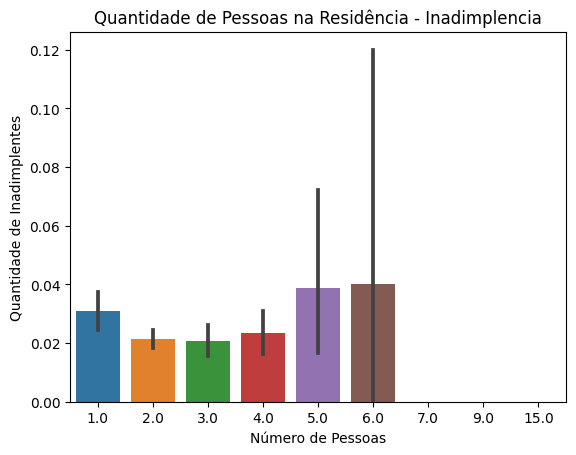

In [30]:
#sns.histplot(x='qt_pessoas_residencia', data=df_adimplente, bins=15)
sns.barplot(x='qt_pessoas_residencia', y='mau', data=df)
plt.title('Quantidade de Pessoas na Residência - Inadimplencia')
plt.xlabel('Número de Pessoas')
plt.ylabel('Quantidade de Inadimplentes')

In [31]:
# Criando uma faixa de pessoas na residência para poder fazer um crosstab
df['faixa_qt_pessoas_residencia'] = pd.cut(df['qt_pessoas_residencia'], bins=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15], 
                           labels=['1', '2', '3', '4', '5', '6-7', '8-9', '10-11', '12-13', '14-15'])

tabela_proporção_pres = pd.crosstab(df['faixa_qt_pessoas_residencia'], df['mau'], normalize='index')
tabela_proporção_pres = tabela_proporção_pres.sort_values(by= True, ascending=False)
tabela_proporção_pres = tabela_proporção_pres.applymap(lambda x: f'{x*100:.2f}%')
tabela_proporção_pres = tabela_proporção_pres.rename(columns={False:'Adimplente', True:'Inadimplente'})
tabela_proporção_pres

mau,Adimplente,Inadimplente
faixa_qt_pessoas_residencia,,
5,96.00%,4.00%
4,96.11%,3.89%
3,97.65%,2.35%
1,97.85%,2.15%
2,97.92%,2.08%
6-7,100.00%,0.00%
10-11,100.00%,0.00%
14-15,100.00%,0.00%


Nas variáveis numéricas fica mais fácil de fazer comparações usando somente o gráfico, mas ainda assim é interessante fazer uma comparação de proporção usando o crosstab e ver o quão distante cada porcentagem está da inadimplencia geral.

## 4\. Modelagem

### 4.1 Preparação dos Dados

Para fazer predições de se um cliente é adimplente ou inadimplente, será utilizado o modelo de machine 
learning Árvore de Decisão, mas para isso primeiramente é necessário fazer a preparação dos dados do
DataFrame para que o modelo possa interpretar os valores nas colunas e fazer o processamento.

Dessa forma, é necessário transformar as variáveis categóricas em valores numéricos para que possam ser utilizadas em um modelo de árvore de decisão. As árvores de decisão são algoritmos que trabalham apenas com valores numéricos, portanto, é necessário converter as variáveis categóricas em valores numéricos antes de utilizá-las como entrada no modelo. O Data Frame vai ser alterado para um DataFrame com Dummies, utilizando a Codificação One-Hot. Nessa abordagem, cada categoria da variável categórica é transformada em uma nova coluna binária (0 ou 1). Cada nova coluna representa uma categoria distinta e indica se a observação pertence ou não a essa categoria.

In [32]:
# Criando novo DataFrame para trabalhar com ML Árvore de Decisão
df_dummy = df.copy()
# Removendo colunas que não vão ser mais usadas
df_dummy = df_dummy.drop(['faixa_idade', 'faixa_emprego', 'faixa_qt_pessoas_residencia'], axis=1)

# Dividindo as colunas do tipo object e numéricas(int e float) para poder aplicar 
# o get_dummies apenas nas object.
colunas_object = df_dummy.select_dtypes(include=['object']).columns
colunas_numericas = df_dummy.select_dtypes(include=['int', 'float', 'bool']).columns

# Aplicando o get_dummies apenas nas colunas object
df_dummy_object = pd.get_dummies(df_dummy[colunas_object], dtype=int)

# Concatenando as colunas alteradas junto com as numéricas originais
colunas_object = df_dummy.select_dtypes(include=['object']).columns
df_dummy = pd.concat([df_dummy[colunas_numericas], df_dummy_object], axis=1)
df_dummy

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,posse_de_veiculo_N,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,0,...,1,0,0,0,0,1,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,False,1,...,0,0,1,0,0,1,0,0,0,0
2,0,52.356164,8.358904,1,0,1,1,1.0,False,1,...,0,0,1,0,0,1,0,0,0,0
3,0,46.224658,2.106849,1,1,1,1,2.0,False,0,...,1,0,0,0,0,1,0,0,0,0
4,0,29.230137,3.021918,1,0,0,0,2.0,False,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,0,54.109589,9.884932,1,0,0,0,2.0,True,1,...,0,0,0,0,0,1,0,0,0,0
16646,0,43.389041,7.380822,1,1,1,0,2.0,True,1,...,1,0,0,0,0,1,0,0,0,0
16647,0,30.005479,9.800000,1,1,0,0,2.0,True,0,...,1,0,0,0,0,1,0,0,0,0
16648,0,30.005479,9.800000,1,1,0,0,2.0,True,0,...,1,0,0,0,0,1,0,0,0,0


Após as alterações, o DataFrame a ser usado ficou da seguinte maneira, onde é atribuido o valor 1 para onde é verdadeiro a situação, ou seja, se a pessoa for um estudante, a respective coluna vai estar preenchida com o valor 1, se possui um imóvel, também tera um valor 1 e assim por diante.

In [33]:
# Demonstrando as colunas novas criadas para ser dummies
df_dummy.dtypes

qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                          bool
posse_de_veiculo_N                          int32
posse_de_veiculo_Y                          int32
posse_de_imovel_N                           int32
posse_de_imovel_Y                           int32
tipo_renda_Commercial associate             int32
tipo_renda_Pensioner                        int32
tipo_renda_State servant                    int32
tipo_renda_Student                          int32
tipo_renda_Working                          int32
educacao_Academic degree                    int32
educacao_Higher education                   int32


### 4.2 Separação de Dados Treino/Teste

A principal razão para essa separação é avaliar a capacidade do modelo de generalizar seu desempenho em dados não vistos anteriormente. Então primeiramente os dados vão ser analisados por um conjunto de 75% de teste e depois será testado por um conjunto de dados de 25% do total de dados.

Ao separar os dados em treino e teste, podemos avaliar o desempenho do modelo utilizando dados de teste que não foram usados durante o treinamento. Isso permite estimar o quão bem o modelo se comportará em situações reais e evitar a ocorrência de superestimação do desempenho do modelo. Além disso a separação dos dados em treino e teste ajuda a identificar se o modelo está sofrendo de overfitting, ou seja, se está se ajustando muito bem aos dados de treinamento, mas não consegue generalizar bem para novos dados. 

In [34]:
# Dividindo as variáveis explicativas e resposta
x = df_dummy.drop('mau', axis=1)
y = df_dummy['mau']

# Dividindo a proporção de dados para treino e teste, o train_test_split já pega na proporção de 75/25
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [35]:
# 12487 Clientes para treino
x_train

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,posse_de_veiculo_N,posse_de_veiculo_Y,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
5950,0,51.076712,1.802740,1,0,0,0,1.0,1,0,...,0,0,1,0,0,1,0,0,0,0
6540,2,32.553425,0.495890,1,0,0,0,3.0,0,1,...,0,0,1,0,0,1,0,0,0,0
16217,0,34.728767,9.465753,1,0,0,0,2.0,1,0,...,1,0,0,0,0,1,0,0,0,0
8755,0,37.394521,3.449315,1,1,1,0,2.0,0,1,...,1,0,0,0,0,1,0,0,0,0
3657,1,32.747945,13.991781,1,1,0,0,3.0,1,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9630,0,64.915068,-1000.665753,1,0,0,1,1.0,1,0,...,0,0,1,0,0,0,1,0,0,0
5164,0,58.594521,-1000.665753,1,0,0,0,2.0,0,1,...,1,0,0,0,0,1,0,0,0,0
6435,0,35.673973,13.923288,1,1,0,0,2.0,1,0,...,1,0,0,0,0,0,0,0,0,1
15299,1,30.443836,1.284932,1,1,1,0,3.0,1,0,...,1,0,0,0,0,1,0,0,0,0


In [36]:
# 4163 Clientes para teste 
x_test

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,posse_de_veiculo_N,posse_de_veiculo_Y,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
8955,0,67.342466,-1000.665753,1,0,0,0,1.0,1,0,...,0,0,0,1,0,1,0,0,0,0
4904,1,37.668493,7.882192,1,1,1,0,3.0,1,0,...,1,0,0,0,0,1,0,0,0,0
192,0,53.950685,14.446575,1,1,1,0,2.0,1,0,...,1,0,0,0,0,1,0,0,0,0
15812,0,38.720548,10.438356,1,0,0,0,2.0,0,1,...,0,0,0,0,0,1,0,0,0,0
12022,0,41.147945,18.328767,1,0,0,0,2.0,0,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4452,0,29.386301,5.263014,1,1,1,0,2.0,1,0,...,1,0,0,0,0,1,0,0,0,0
13532,0,58.528767,-1000.665753,1,0,0,0,2.0,1,0,...,1,0,0,0,0,0,1,0,0,0
2447,2,37.249315,6.202740,1,0,0,0,4.0,0,1,...,1,0,0,0,0,1,0,0,0,0
6106,1,31.342466,1.830137,1,0,1,0,3.0,0,1,...,1,0,0,0,0,1,0,0,0,0


A função RandomForestClassifier é um algoritmo de aprendizado de máquina que pertence à família de modelos de floresta aleatória. Essa classe é usada para realizar classificação usando múltiplas árvores de decisão.

Cada árvore de decisão na floresta é treinada em uma amostra aleatória dos dados de treinamento, com substituição (conhecida como bootstrapping), e cada árvore é treinada de forma independente. Durante a previsão, as árvores individuais votam na classe prevista e a classe com mais votos é escolhida como a predição final.

### 4.3 Treino e Acurácia

In [37]:
# Atribuindo o comando de RandomForestClassifier para clf com 40 arvores de decisão
clf = RandomForestClassifier(n_estimators=40)
# Treinando as variáveis explicativas (x) com base na resposta (y)
clf.fit(x_train, y_train)


# Calculando a acuracia
y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
acc

0.9752582272399711

A árvore de decisão possui vários hiperparâmetros que podem ser ajustados para melhorar seu desempenho. Por exemplo, você pode tentar alterar a profundidade máxima da árvore, o número mínimo de amostras necessárias para dividir um nó, o critério de divisão, entre outros. Ajustar esses parâmetros pode levar a resultados melhores, então será feito alterações da profundidade e do número de amostras para tentativa de um resultado melhor.

In [38]:
# Criando um novo conjunto de arvores com alguns parametros diferentes, onde max_depth é a profundidade
# e min_samples_split é o número minimo de amostras que deve conter para ser levado em consideração

# Atribuindo o comando de RandomForestClassifier para clf com 40 arvores de decisão
clf_cuted = RandomForestClassifier(n_estimators=40, max_depth=10, min_samples_split=10)

# Treinando as variáveis explicativas (x) com base na resposta (y)
clf_cuted.fit(x_train, y_train)

# Calculando a acuracia
y_pred = clf_cuted.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
acc

0.9757386500120105

### Matriz Confusão

A matriz de confusão é uma ferramenta fundamental para avaliar o desempenho de modelos de classificação. Ela fornece uma visão detalhada das previsões do modelo em relação aos valores reais dos dados. No exemplo abaixo é possível ver os clientes que foram classificados corretamente como adimplentes, 4035 verdadeiro positivo, os cliente que foram classificados corretamente como inadimplentes, 28 verdadeiro negativo, os clientes que deveriam ter sido classificados como adimplentes mas foram classificados como inadimplentes, 29 falso positivo e os clientes que deveriam ser classificados como inadimplentes e foram classificados como adimplentes, 71 falso negativo.

In [39]:
# Fazendo a matriz confusão com um DataFrame

# Deixei esse exemplo extra, pois houve atualização nos pacotes do sklearn e algumas pessoas 
# Não estão conseguindo usar o Confusion Matrix, talvez ajude

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=['Aprovados', 'Reprovados'], columns=['Aprovados', 'Reprovados'])
df_cm

,Aprovados,Reprovados
Aprovados,4061,0
Reprovados,101,1


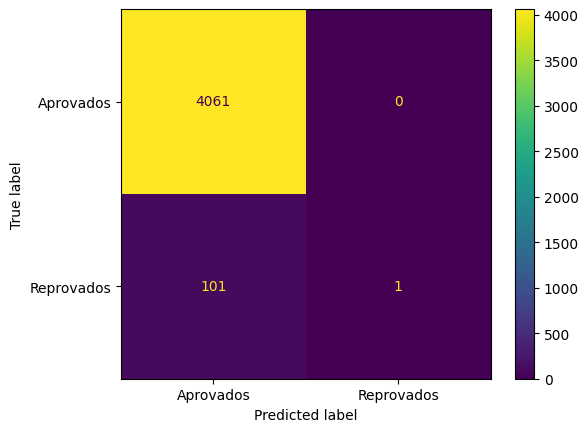

In [40]:
# Utilizando o pacote do ConfusionMatrixDisplay para fazer a mesma matriz confusão
cm = confusion_matrix(y_test, y_pred)
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])
cm_plot.plot()

##### Segue um exemplo de como ficaria uma das arvores.

<function matplotlib.pyplot.show(close=None, block=None)>

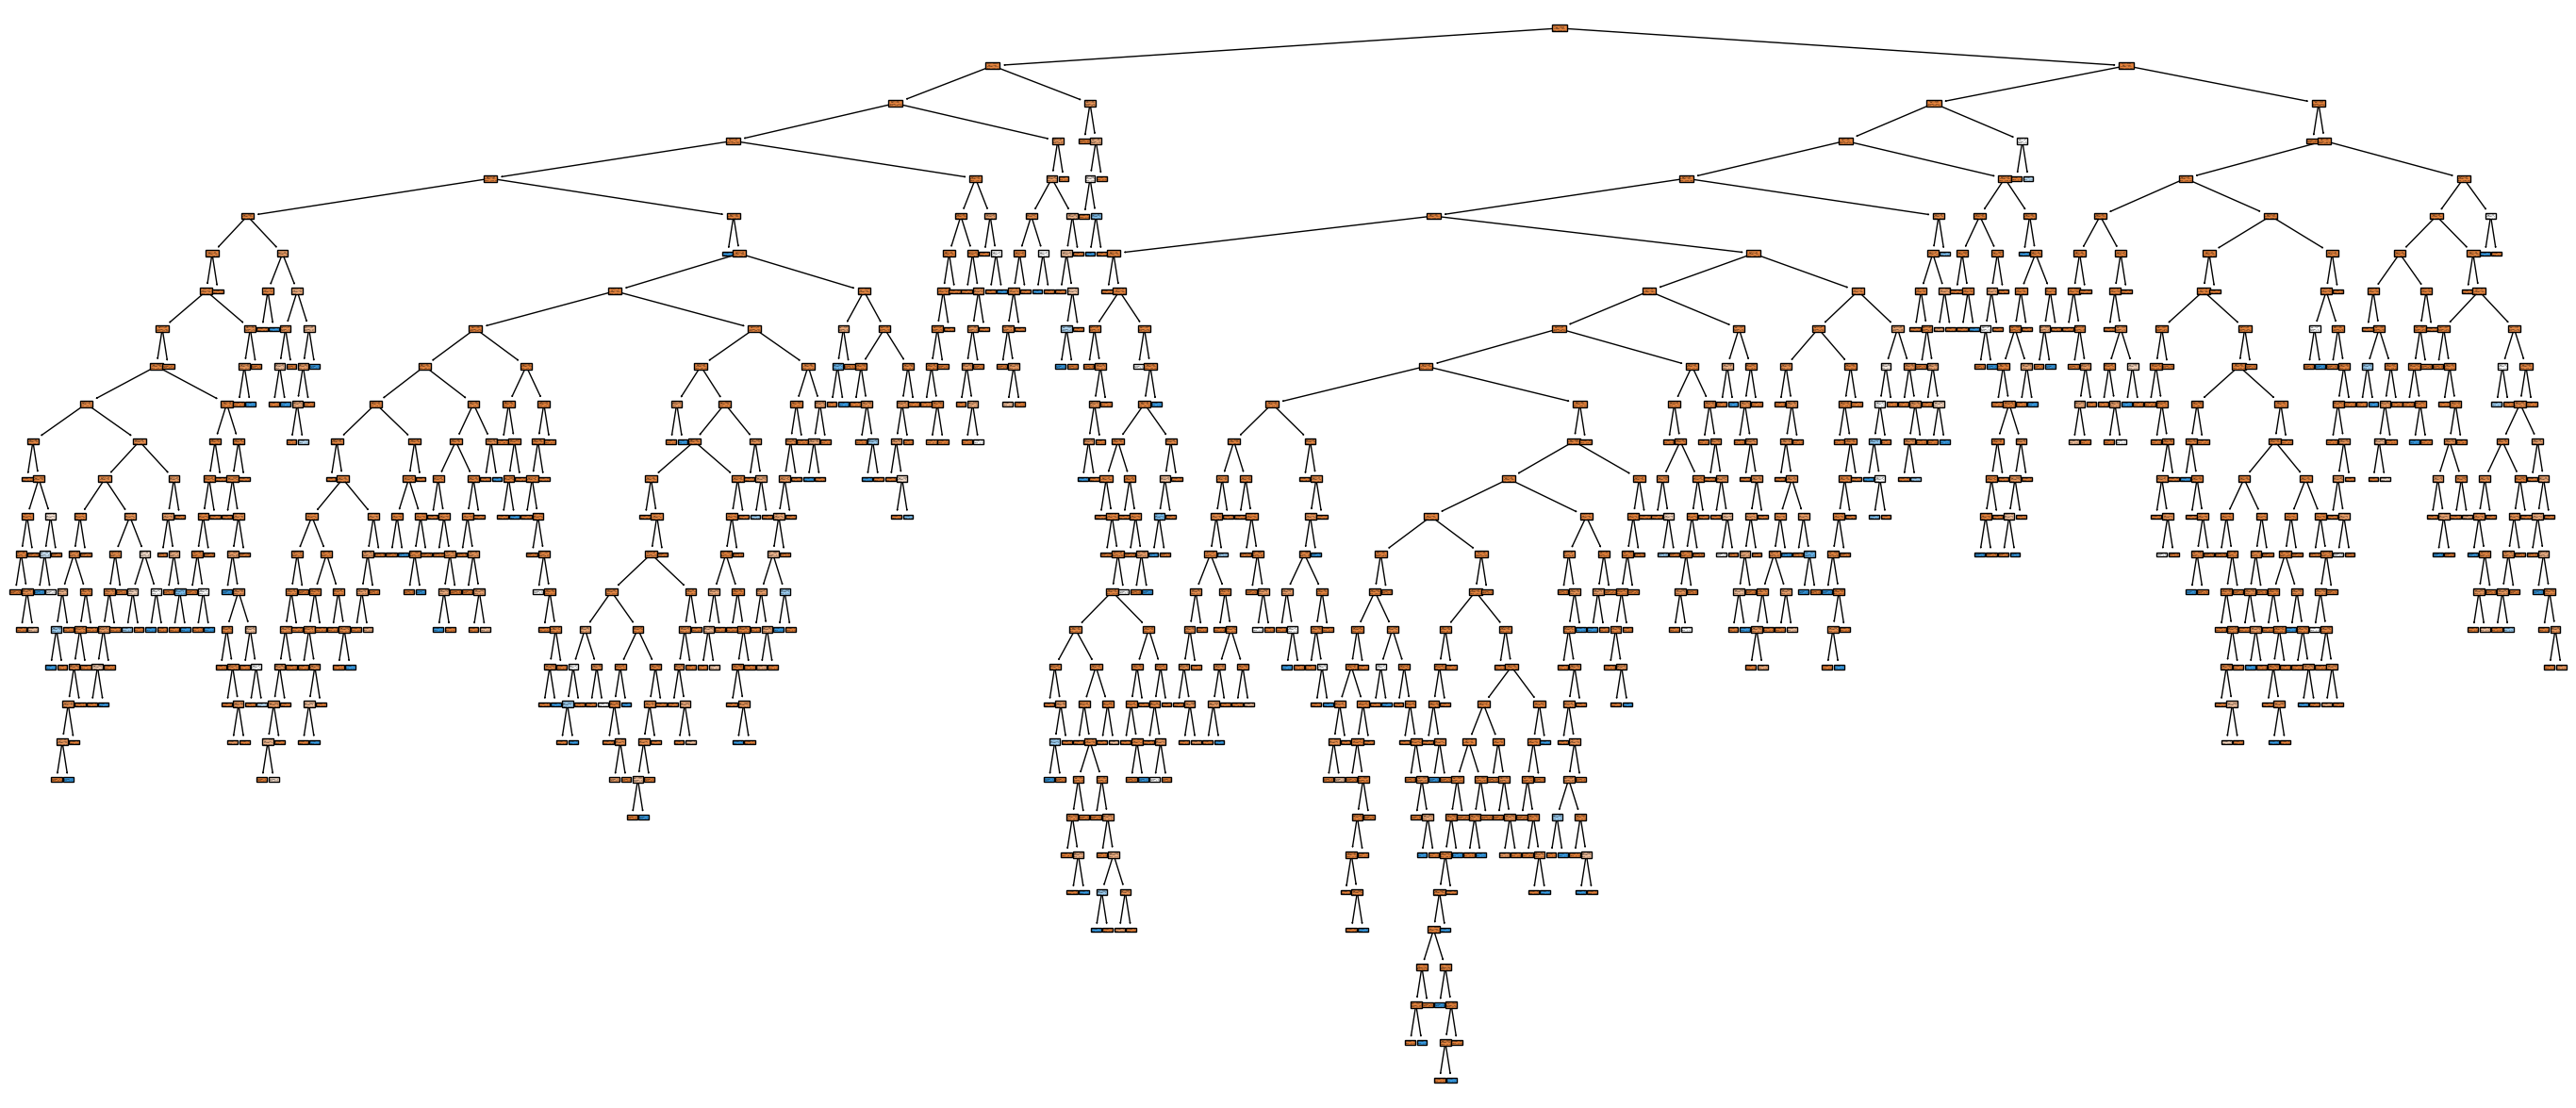

In [41]:
# Selecionando arvore especifica
tree_to_plot = clf.estimators_[0]

plt.figure(figsize=(35, 15))
plot_tree(tree_to_plot, filled=True)
plt.show

## 5\. Conclusões

Para fazer predição de valores é necessário ter uma base de dados confiável e com uma variedade de variáveis explicativas bem relacionadas com a variável resultado para poder se pautar, no geral foi visto que a inadimplencia está em uma taxa de 2.34% e esse é um bom valor a comparar por outras variáveis, visto que é contra-intuitivo em alguns casos que também possuem um valor baixo, porém se comparados com o valor geral, valores baixos podem representar uma diferença muito significativa. As pessoas que tem ensino superior incompleto por exemplo e tem uma taxa de inadimplencia de 3.85%, tem esse valor 64,52% maior do que a taxa geral, o que representa uma grande diferença.

Se for levar em consideração que a arvore de decisão acertou 97,59% dos casos, também não pode ser encarado como sendo um sistema conclusivo, porque errou 2.41% das vezes, uma taxa até maior do que a calculada anteriormente nos dados gerais. Quando a árvore de decisão não é suficiente, é importante explorar outras abordagens e técnicas para obter melhores resultados. Cada problema é único, e diferentes abordagens podem ser necessárias para alcançar a solução desejada. No caso acima foi alterado os hyper-parâmetros das arvores diversas vezes afim de obter um resultado mais satisfatório, porém ainda assim não foi o suficiente, sendo assim, seria interessante explorar outros algoritimos de aprendizado de máquina e comparar os resultados, alguns exemplos incluem regressão logística, SVM (Support Vector Machines), redes neurais, gradient boosting, entre outros.